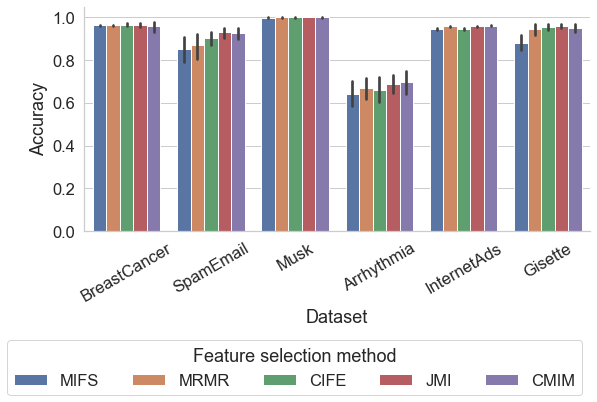

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv('scikit-feature/results/performance.csv')

df = df.loc[-df['dataset'].isin(['HousingPrices', 'TOPO', 'QSAR'])]

sns.set(font_scale=1.5, style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="dataset", y="accuracy", hue="method_name",
    height=4, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "Accuracy")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=5, title="Feature selection method")

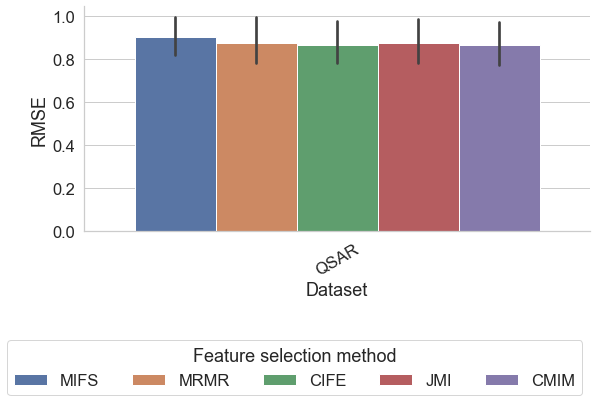

In [140]:
sns.set_theme(style="whitegrid")

df = pd.read_csv('scikit-feature/results/performance.csv')

df = df.loc[df['dataset'].isin(['Housing prices', 'Topo2', 'QSAR'])]

sns.set(font_scale=1.5, style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="dataset", y="accuracy", hue="method_name",
    height=4, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("Dataset", "RMSE")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(1, -0.45), ncol=5, title="Feature selection method")

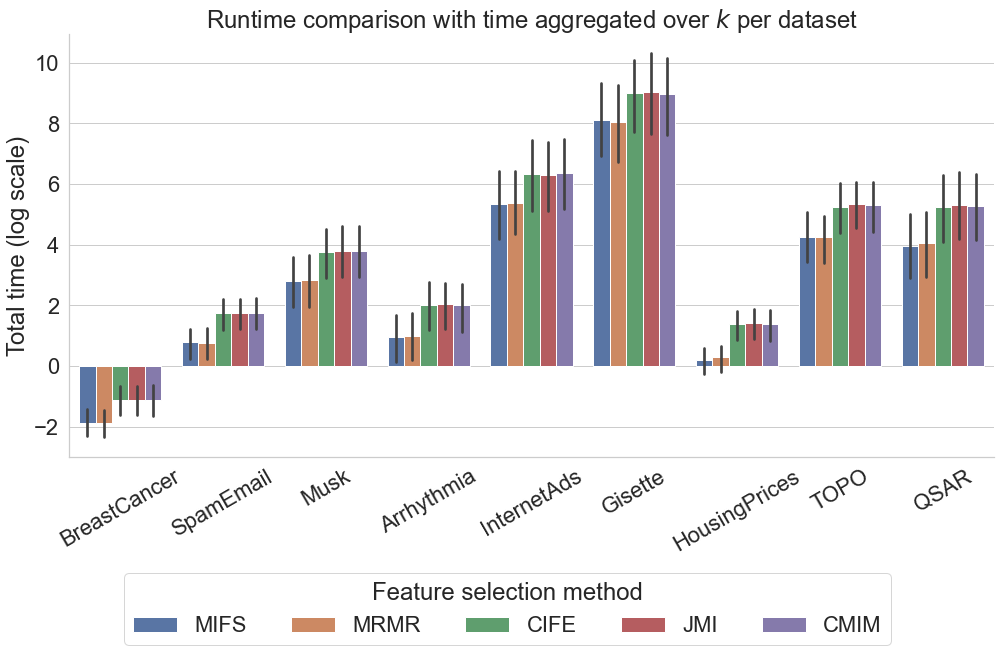

In [141]:
sns.set(font_scale=2, style="whitegrid")
runtime = pd.read_csv('scikit-feature/results/performance.csv')
runtime['time'] = runtime['time'].apply(lambda x: np.log(x))

g = sns.catplot(
    data=runtime, kind="bar",
    x="dataset", y="time", hue="method_name",
    height=7, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.title('Runtime comparison with time aggregated over $k$ per dataset')
g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("", "Total time (log scale)")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.25), ncol=5, title="Feature selection method")
plt.savefig('scikit-feature/results/information_theory_runtime.pdf', dpi=300, bbox_inches="tight")

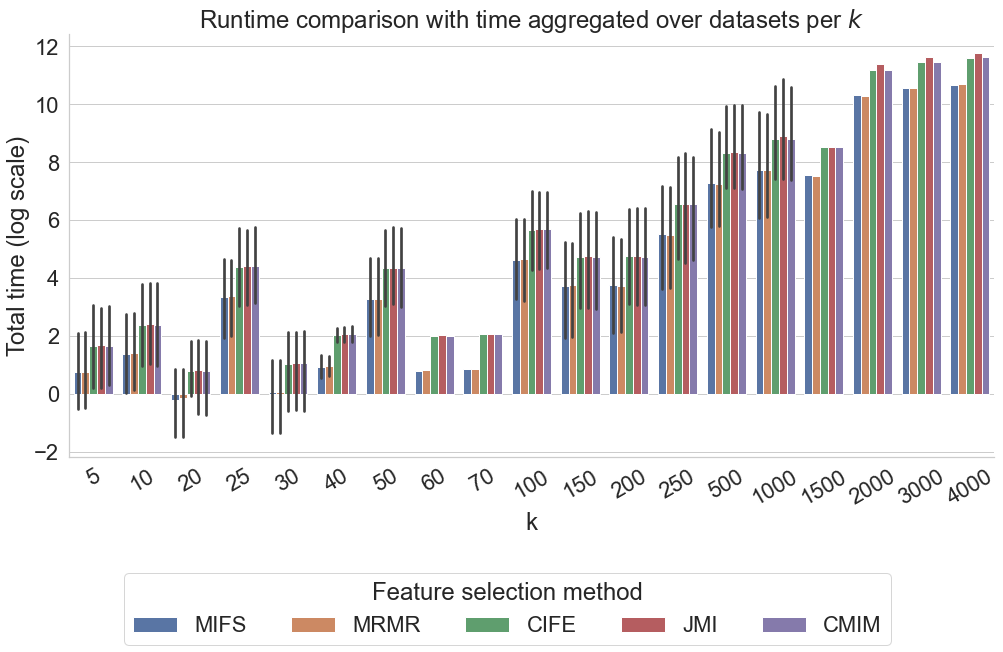

In [159]:
sns.set(font_scale=2, style="whitegrid")
runtime = pd.read_csv('scikit-feature/results/performance.csv')
runtime['time'] = runtime['time'].apply(lambda x: np.log(x))

g = sns.catplot(
    data=runtime, kind="bar",
    x="k", y="time", hue="method_name",
    height=7, aspect=2
)

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.title('Runtime comparison with time aggregated over datasets per $k$')
g.set_xticklabels(labels, rotation=30)
g.set_axis_labels("k", "Total time (log scale)")
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.9, -0.25), ncol=5, title="Feature selection method")
plt.savefig('scikit-feature/results/information_theory_runtime_k_average.pdf', dpi=300, bbox_inches="tight")

              accuracy          time method_name
method_name                                     
MIFS         87.490643   3538.475907        MIFS
MRMR         89.061912   3340.531819        MRMR
CIFE         89.879636   8492.677746        CIFE
JMI          91.161451  10050.264323         JMI
CMIM         91.010773   8527.423563        CMIM


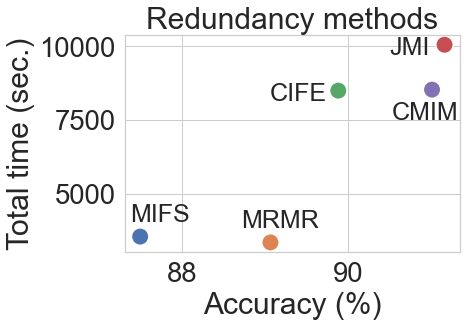

In [3]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('scikit-feature/results/performance.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['dataset'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["accuracy"] = pd.to_numeric(runtime["accuracy"])

a = runtime[['accuracy', "method_name"]].groupby("method_name").mean()
b = runtime[['time', "method_name"]].groupby("method_name").mean()

a = pd.concat([a, b], axis=1)
a = a.reindex(["MIFS", "MRMR", "CIFE", 'JMI', 'CMIM'])
a['method_name'] = ["MIFS", "MRMR", "CIFE", 'JMI', 'CMIM']
a['accuracy'] = a['accuracy'].multiply(100)
print(a)

g = sns.scatterplot(
    data=a,
    x="accuracy", y="time", hue='method_name', s=300
)

for i, row in a[a['method_name'].isin(['MIFS'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(20,15), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['MRMR'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(10,15), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['CIFE'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-40,-10), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['JMI'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-35,-10), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['CMIM'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-7,-30), ha='center', fontsize=25)

g.set_ylabel('Total time (sec.)')
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Redundancy methods')
plt.savefig('scikit-feature/results/information_theory_accuracy_runtime.pdf', dpi=300, bbox_inches="tight")

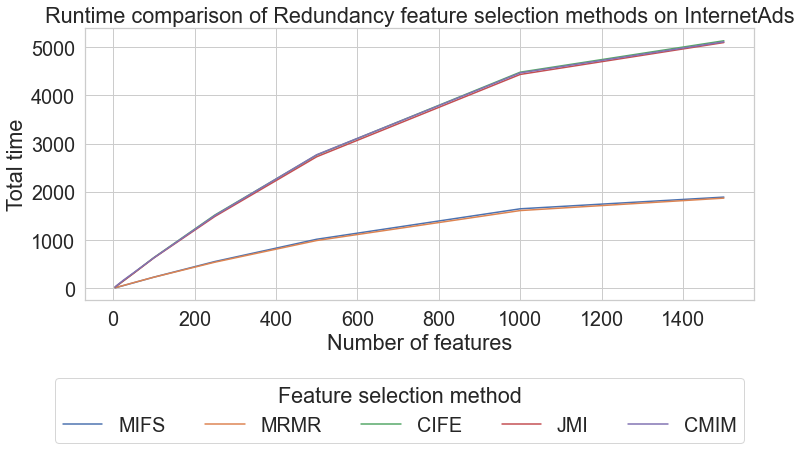

In [144]:
sns.set(font_scale=1.8, style="whitegrid")
plt.subplots(figsize=(12, 5))
gisette = pd.read_csv('scikit-feature/results/performance.csv')
gisette = gisette[gisette['dataset']=='InternetAds']

g = sns.lineplot(
    data=gisette,
    x="k", y="time", hue="method_name"
)

plt.title('Runtime comparison of Redundancy feature selection methods on InternetAds')
g.set_xlabel('Number of features')
g.set_ylabel("Total time")

hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(1, -0.25), ncol=5, title="Feature selection method")
plt.savefig('scikit-feature/results/information_theory_runtime_gisette.pdf', dpi=300, bbox_inches="tight")

              accuracy       time method_name
method_name                                  
GroupLasso   95.872507  73.004983  GroupLasso
OGFS         89.662375  49.726516        OGFS
SAOLA        85.810478   0.527446     g-SAOLA


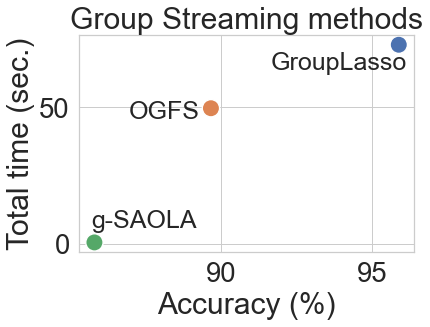

In [4]:
plt.subplots(figsize=(6, 4))

sns.set(font_scale=2.5, style="whitegrid")
runtime = pd.read_csv('scikit-feature/matlab_only_k.csv')
# runtime['time'] = runtime['time'].apply(lambda x: np.log(x))
runtime = runtime.loc[-runtime['dataset'].isin(['HousingPrices', 'TOPO', 'QSAR'])]
runtime["accuracy"] = pd.to_numeric(runtime["accuracy"])

a = runtime[['accuracy', "method_name"]].groupby("method_name").mean()
b = runtime[['time', "method_name"]].groupby("method_name").mean()

a = pd.concat([a, b], axis=1)

a['method_name'] = ["GroupLasso", "OGFS", "g-SAOLA"]

a['accuracy'] = a['accuracy'].multiply(100)
print(a)

g = sns.scatterplot(
    data=a,
    x="accuracy", y="time", hue='method_name', s=300
)

for i, row in a[a['method_name'].isin(['g-SAOLA'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(50,15), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['OGFS'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-47,-10), ha='center', fontsize=25)

for i, row in a[a['method_name'].isin(['GroupLasso'])].iterrows():
    plt.annotate(row['method_name'], (row['accuracy'], row['time']), textcoords="offset points", xytext=(-60,-25), ha='center', fontsize=25)

g.set_ylabel('Total time (sec.)')
g.set_xlabel('Accuracy (%)')

plt.legend([],[], frameon=False)

plt.title('Group Streaming methods')
plt.savefig('scikit-feature/results/matlab_accuracy_runtime.pdf', dpi=300, bbox_inches="tight")